# Data Visualization Tests

This file is to help plot the data, and discover trends

## Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import MAGAN

2024-05-07 16:34:55.703320: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


MAGAN is running on TensorFlow 2.16.1


In [6]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
tma.clear_directory()

True

In [3]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms("winequality-red.csv", split = "random", percent_of_anchors = [0.1], random_state=186, verbose = 2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels)



 
 
---------------------------       Initalizing class with winequality-red.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (1599, 6)
Split B Features shape (1599, 5)
MDS initialized with 5 components
The knn values are: (2, 34, 66, 98, 130, 162, 194, 226, 258, 290)

-------------------------------------    SPUD Tests winequality-red   -------------------------------------

Operation average
    Kind distance
        KNN 2
            Percent of Anchors 0.1
                FOSCTTM Score: 0.35937173053358473
                Unable to calculate Cross Embedding
        KNN 34
            Percent of Anchors 0.1


In [4]:
"""Testing All functions"""
class_instances = tma.run_all_tests(csv_files = ["iris.csv"], test_random = 1, #General function arguments
                                split = "random", verbose = 2, percent_of_anchors = [0.1, 0.2], #Init Key arguments
                                run_DIG = False, page_ranks = ("None", "off-diagonal", "full"), predict = True, #DIG key arguments
                                run_DTA = False,
                                run_NAMA = False,
                                run_SSMA = False,
                                run_SPUD = True) #SPUD key arguments | SPUDS_Algorithm


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 1)
Split B Features shape (150, 3)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

-------------------------------------    SPUD Tests iris   -------------------------------------

Operation average
    Kind distance
        KNN 2
            Percent of Anchors 0.1
                FOSCTTM Score: 0.35977777777777786
                CE Score: 0.6733333333333333
            Percent of Anchors 0.2
                FOSCTTM Score: 0.2690222222222222
                CE Score: 0.6666666666666666
        KNN 6
            Percent of Anchors 0.1
                FOSCTTM Score: 0.2711111111111111
                CE Score: 0.8466666666666667
            Percent of Anchors 0.2
                FOSCTTM Score: 0.16275555555555557
                CE Score: 0.8733333333333333
        KNN 10
   

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (6, 10) + inhomogeneous part.

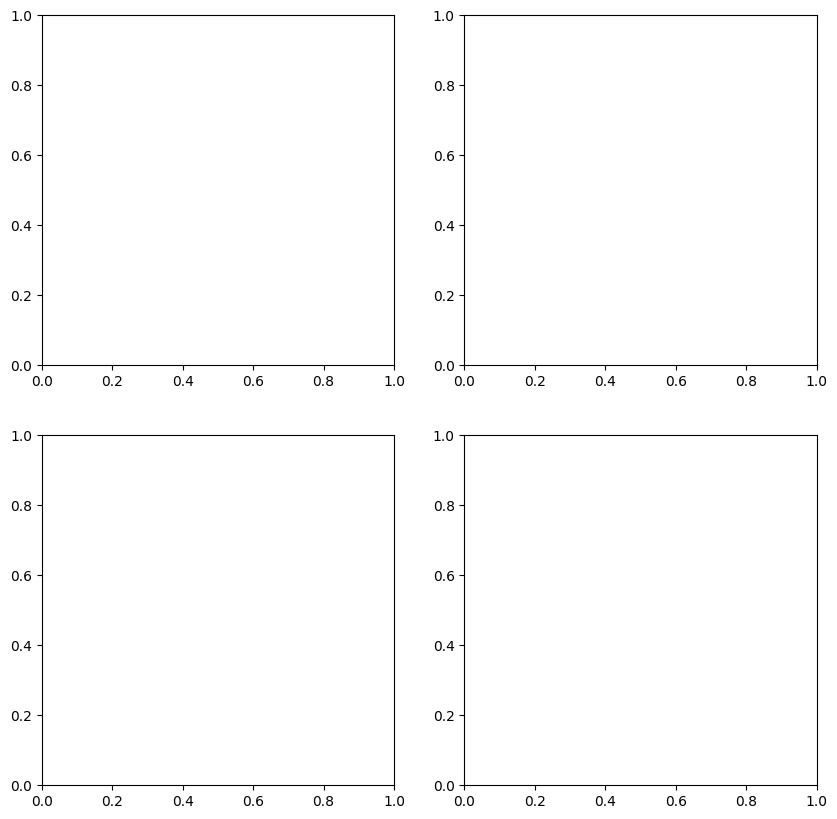

In [5]:
"""Visualization"""
#Veiwing with MatplotLib
tma.visualize_results(file_names = 'all')

In [7]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_Anchors',
       'FOSCTTM', 'Cross_Embedding_KNN', 'Page_Rank', 'Predicted_Feature_MAE',
       'Operation', 'SPUDS_Algorithm'],
      dtype='object')

In [8]:
df.groupby(['csv_file', 'method'])[['FOSCTTM', "Cross_Embedding_KNN"]].mean()

,,FOSCTTM,Cross_Embedding_KNN
csv_file,method,,
iris,SPUD,0.309136,0.657333


In [9]:
#These are all DIG Methods
df.groupby(['csv_file', "Page_Rank"])[['FOSCTTM', "Cross_Embedding_KNN", "Predicted_Feature_MAE"]].mean()

,,FOSCTTM,Cross_Embedding_KNN,Predicted_Feature_MAE
csv_file,Page_Rank,,,


In [10]:
#These are all SPUD Methods
df.groupby(['csv_file', "Operation", "SPUDS_Algorithm"])[['FOSCTTM', "Cross_Embedding_KNN"]].mean()

FOSCTTM  Cross_Embedding_KNN
csv_file Operation SPUDS_Algorithm                               
iris     abs       distance         0.319982             0.732667
                   pure             0.314418             0.593333
                   similarity       0.314418             0.581333
         average   distance         0.259089             0.709333
                   pure             0.323453             0.706667
                   similarity       0.323453             0.620667

# Debugging Tests Below

In [7]:
wine_tma = tma.test_manifold_algorithms("hill_valley.csv", split = "random", percent_of_anchors = [0.1], random_state=186, verbose = 2)


 
 
---------------------------       Initalizing class with hill_valley.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (606, 44)
Split B Features shape (606, 56)
MDS initialized with 44 components
The knn values are: (2, 15, 28, 41, 54, 67, 80, 93, 106, 119)


In [2]:
#Additional imports
from SPUD import SPUD
from DIG import DIG
import numpy as np

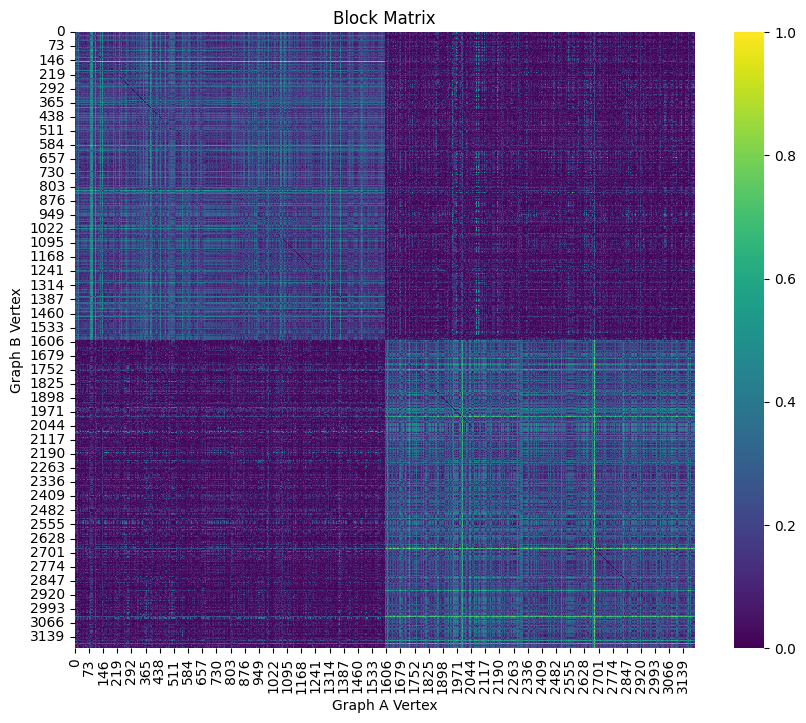

In [6]:
wine_SPUD = SPUD(wine_tma.split_A, wine_tma.split_B, wine_tma.anchors[:170], knn = 162, operation = "abs", kind = "distance", show = True)

In [8]:
wine_tma.run_SPUD_tests(operations=["abs"], kind = ["distance"])


-------------------------------------    SPUD Tests hill_valley   -------------------------------------

Operation abs
    Kind distance
        KNN 2
            Percent of Anchors 0.1
                FOSCTTM Score: 0.19322452047184918
                CE Score: 0.5033003300330033
        KNN 15
            Percent of Anchors 0.1
                FOSCTTM Score: 0.005840930627716237
                CE Score: 0.504950495049505
        KNN 28
            Percent of Anchors 0.1
                FOSCTTM Score: 0.005704778398631942
                CE Score: 0.5115511551155115
        KNN 41
            Percent of Anchors 0.1
                FOSCTTM Score: 0.005612194882854622
                CE Score: 0.5115511551155115
        KNN 54
            Percent of Anchors 0.1
                FOSCTTM Score: 0.005584964437037763


KeyboardInterrupt: 

In [6]:
wine_DIG = DIG(wine_tma.split_A[:100], wine_tma.split_B[:100], wine_tma.anchors[(wine_tma.anchors < 100)[:,1]][:35])

Model Stress: 162.3807142156683
Cross Embedding: 0.17
FOSCTTM: 0.22829999999999998


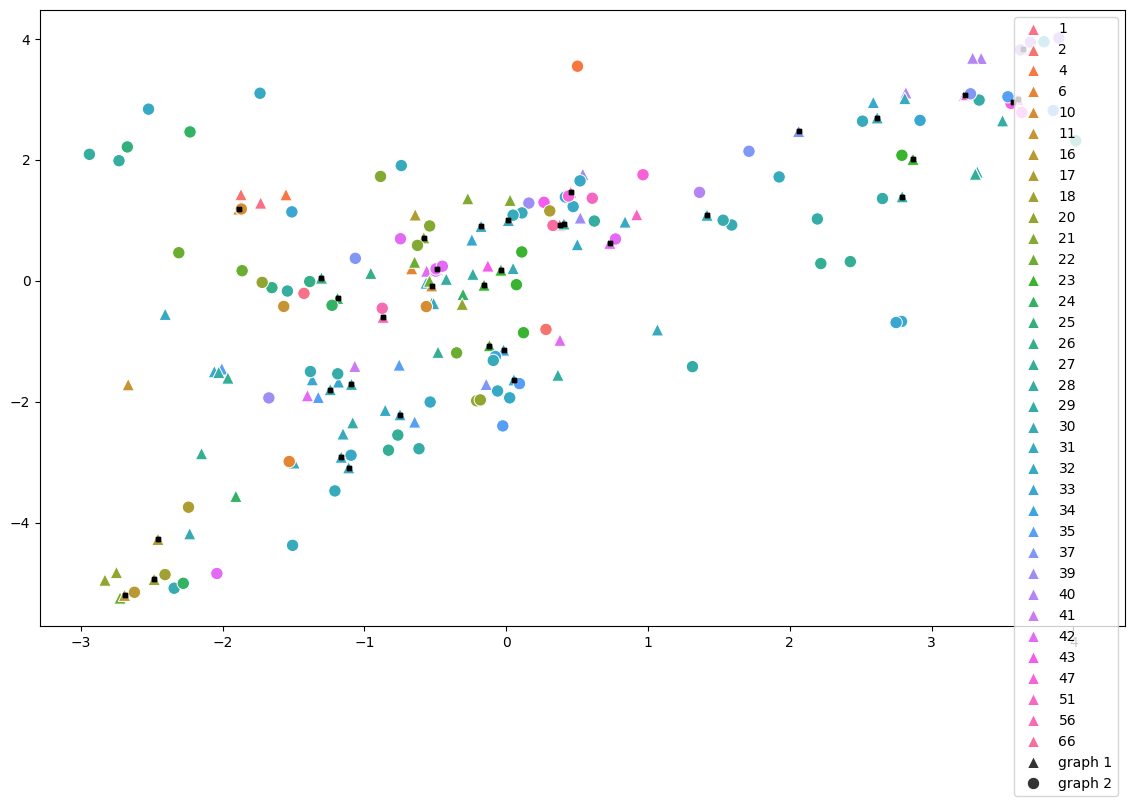

In [7]:
wine_DIG.plot_emb(np.concatenate([wine_tma.labels[:100], wine_tma.labels[:100]]), wine_DIG.sim_diffusion_matrix, n_comp=5, show_lines=False, show_anchors=True)

In [5]:
np.unique(wine_tma.labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])